## Bro if you drop duplicates they will keep the protein-coding ones with same cds and label them as non-coding genes

### Coding intragenic genes(Intronic vs Exonic sense miRs)

### Exonic 

In [1]:
import import_ipynb
import pandas as pd
import os
import matplotlib.pyplot as plt
from utils.EXONIC import Regions

importing Jupyter notebook from /Users/tyronchang/Desktop/exonic-microrna-analysis/github3/Mouse/utils/EXONIC.ipynb


In [2]:
current_dir=os.getcwd()
csv_file_path=f'{current_dir}/Mouse_csv_file'
excel_file_path=f'{current_dir}/Mouse_excel_file'

In [3]:
mouse_exonicmiR_df_new=pd.read_csv(f"{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv")

In [4]:
### The unique list of miRNAs (proten-coding)
mouse_exonicmiR_df_coding=Regions(f'{csv_file_path}/mouse_exonic_miR(gene_type)_NCBI.csv')
mouse_exonicmiR_df_coding.select_coding()
mouse_exonicmiR_df_coding.df.drop_duplicates(subset=['miR_name'],inplace=True)
mouse_exonicmiR_df_coding.df.shape
mouse_exonicmiR_df_coding=mouse_exonicmiR_df_coding.df


In [5]:
mouse_exonicmiR_df_coding.shape

(83, 21)

In [6]:
### The unique list of miRNAs (non-coding)
mouse_exonicmiR_df_noncoding=Regions(f'{csv_file_path}/mouse_exonic_miR(gene_type)_NCBI.csv')
mouse_exonicmiR_df_noncoding.df.drop_duplicates(subset=['miR_name'],inplace=True)
mouse_exonicmiR_df_noncoding.select_noncoding()
mouse_exonicmiR_df_noncoding.df.shape

(90, 21)

In [7]:
#"Chpf2","Dennd6b","Clcn7" are classified as protein-coding instead of non-coding genes
mouse_exonicmiR_df_noncoding=mouse_exonicmiR_df_noncoding.df[~mouse_exonicmiR_df_noncoding.df["hostgene_Name"].isin(["Chpf2","Dennd6b","Clcn7"])]     

In [8]:
mouse_exonicmiR_df_noncoding.shape

(87, 21)

In [9]:
mouse_exonicmiR_df_new=pd.concat([mouse_exonicmiR_df_coding, mouse_exonicmiR_df_noncoding],axis=0)

In [10]:
mouse_exonicmiR_df_new.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_exonCounts', 'hostgene_txStarts', 'hostgene_txEnds',
       'pre_mRNA_length', 'mature_host_mRNA_Length', 'hostgene_Name',
       'hostgene_NCBI_ID', 'miR_name', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_strand', 'miR_ID', 'gene_type'],
      dtype='object')

In [11]:
mouse_exonicmiR_df_new.shape

(170, 21)

In [12]:
mouse_exonicmiR_df_new["host_gene_region"]="exons"

In [13]:
mouse_intramiR_exonic_gene_type=mouse_exonicmiR_df_new[[ 'hostgene_NCBI_ID', 'hostgene_Name','hostgene_strand',
       'miR_name', 'miR_type', 'miR_strand', 'miR_ID','gene_type','host_gene_region']]

In [14]:
mouse_intramiR_exonic_gene_type

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_type,miR_strand,miR_ID,gene_type,host_gene_region
10,XM_030248982.1,Strbp,-,mmu-mir-5128,miRNA_primary_transcript,-,Alias=MI0018040,protein-coding gene,exons
11,NM_010434.2,Hipk3,-,mmu-mir-1902,miRNA_primary_transcript,-,Alias=MI0008313,protein-coding gene,exons
13,XM_006500575.3,Lama5,-,mmu-mir-7005,miRNA_primary_transcript,-,Alias=MI0022854,protein-coding gene,exons
16,XM_011239023.3,Gad2,+,mmu-mir-3967,miRNA_primary_transcript,+,Alias=MI0016976,protein-coding gene,exons
17,XM_006498476.4,Cercam,+,mmu-mir-219b,miRNA_primary_transcript,+,Alias=MI0024990,protein-coding gene,exons
...,...,...,...,...,...,...,...,...,...
317,NR_162790.1,Gm51291,+,mmu-mir-3083b,miRNA_primary_transcript,+,Alias=MI0040630,non-coding gene,exons
318,NR_128569.1,Gm27740,-,mmu-mir-6967-2,miRNA_primary_transcript,-,Alias=MI0031752,non-coding gene,exons
320,NR_162791.1,Gm51284,-,mmu-mir-12189,miRNA_primary_transcript,-,Alias=MI0040631,non-coding gene,exons
321,NR_162792.1,Gm51270,-,mmu-mir-12190,miRNA_primary_transcript,-,Alias=MI0040632,non-coding gene,exons


In [15]:
mouse_intramiR_exonic_gene_type.to_csv(f'{csv_file_path}/mouse_exonic_miR(gene_type)_NCBI_unique.csv',index=False)
mouse_intramiR_exonic_gene_type.to_excel(f'{excel_file_path}/mouse_exonic_miR(gene_type)_NCBI_unique.xlsx',index=False)

### Intronic 

In [16]:
mouse_intronicmiR_df_gene_type=Regions(f'{csv_file_path}/mouse_intronic_miR(gene_type)_NCBI.csv')
mouse_intronicmiR_df_gene_type.df.drop_duplicates(subset=['miR_name'],inplace=True)
mouse_intronicmiR_df_gene_type.df.shape

(599, 17)

In [17]:
mouse_intronicmiR_df_gene_type.df.columns

Index(['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'pre_mRNA_length',
       'hostgene_strand', 'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom',
       'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_name', 'miR_strand',
       'miR_ID', 'gene_type'],
      dtype='object')

In [18]:
mouse_intronicmiR_df_gene_type=mouse_intronicmiR_df_gene_type.df

In [19]:
mouse_intronicmiR_df_gene_type["host_gene_region"] = "introns"

In [20]:
mouse_intronicmiR_df_gene_type

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,pre_mRNA_length,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,miR_ID,gene_type,host_gene_region
0,chr1,160219173,160792925,160224215,160740889,573752.0,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,Alias=MI0009914,protein-coding gene,introns
5,chr1,33907887,34308652,33908271,34307592,400765.0,+,Dst,XM_006495682.3,chr1,34117359,34117431,miRNA_primary_transcript,mmu-mir-6896,+,Alias=MI0022743,protein-coding gene,introns
35,chr1,36140027,36244302,36144225,36244127,104275.0,-,Uggt1,NM_198899.2,chr1,36144252,36144313,miRNA_primary_transcript,mmu-mir-6897,-,Alias=MI0022744,protein-coding gene,introns
37,chr1,64029447,64121504,64035712,64121001,92057.0,-,Klf7,XM_006496351.3,chr1,64042438,64042501,miRNA_primary_transcript,mmu-mir-6899,-,Alias=MI0022746,protein-coding gene,introns
44,chr1,73618380,73864466,73864466,73864466,246086.0,-,6030407O03Rik,NR_045311.1,chr1,73855477,73855575,miRNA_primary_transcript,mmu-mir-6351,-,Alias=MI0021879,non-coding gene,introns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,chr19,24919628,24961663,24920592,24940816,42035.0,-,Cbwd1,XM_030250891.1,chr19,24942235,24942303,miRNA_primary_transcript,mmu-mir-3084-1,-,Alias=MI0014047,protein-coding gene,introns
3991,chr19,29101374,29143843,29101504,29143292,42469.0,+,Rcl1,NM_021525.2,chr19,29135279,29135375,miRNA_primary_transcript,mmu-mir-101b,+,Alias=MI0000649,protein-coding gene,introns
3994,chr19,34922334,34966133,34924625,34961312,43799.0,+,Kif20b,XM_011247247.3,chr19,34965396,34965469,miRNA_primary_transcript,mmu-mir-1950,+,Alias=MI0009941,protein-coding gene,introns
4004,chr19,46338759,46344131,46344131,46344131,5372.0,+,Gm36493,XR_386763.4,chr19,46342762,46342870,miRNA_primary_transcript,mmu-mir-146b,+,Alias=MI0004665,non-coding gene,introns


In [21]:
mouse_intramiR_exonic_gene_type.columns

Index(['hostgene_NCBI_ID', 'hostgene_Name', 'hostgene_strand', 'miR_name',
       'miR_type', 'miR_strand', 'miR_ID', 'gene_type', 'host_gene_region'],
      dtype='object')

In [22]:
len(mouse_intramiR_exonic_gene_type.columns)

9

In [23]:
mouse_intramiR_exonic_gene_type

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_type,miR_strand,miR_ID,gene_type,host_gene_region
10,XM_030248982.1,Strbp,-,mmu-mir-5128,miRNA_primary_transcript,-,Alias=MI0018040,protein-coding gene,exons
11,NM_010434.2,Hipk3,-,mmu-mir-1902,miRNA_primary_transcript,-,Alias=MI0008313,protein-coding gene,exons
13,XM_006500575.3,Lama5,-,mmu-mir-7005,miRNA_primary_transcript,-,Alias=MI0022854,protein-coding gene,exons
16,XM_011239023.3,Gad2,+,mmu-mir-3967,miRNA_primary_transcript,+,Alias=MI0016976,protein-coding gene,exons
17,XM_006498476.4,Cercam,+,mmu-mir-219b,miRNA_primary_transcript,+,Alias=MI0024990,protein-coding gene,exons
...,...,...,...,...,...,...,...,...,...
317,NR_162790.1,Gm51291,+,mmu-mir-3083b,miRNA_primary_transcript,+,Alias=MI0040630,non-coding gene,exons
318,NR_128569.1,Gm27740,-,mmu-mir-6967-2,miRNA_primary_transcript,-,Alias=MI0031752,non-coding gene,exons
320,NR_162791.1,Gm51284,-,mmu-mir-12189,miRNA_primary_transcript,-,Alias=MI0040631,non-coding gene,exons
321,NR_162792.1,Gm51270,-,mmu-mir-12190,miRNA_primary_transcript,-,Alias=MI0040632,non-coding gene,exons


In [24]:
mouse_intronicmiR_df_gene_type.columns

Index(['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'pre_mRNA_length',
       'hostgene_strand', 'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom',
       'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_name', 'miR_strand',
       'miR_ID', 'gene_type', 'host_gene_region'],
      dtype='object')

In [25]:
mouse_intronicmiR_df_gene_type = mouse_intronicmiR_df_gene_type[
    ['hostgene_NCBI_ID', 'hostgene_Name', 'hostgene_strand', 
     'miR_name', 'miR_type','miR_strand', 'miR_ID', 'gene_type', 'host_gene_region']
]

In [26]:
len(mouse_intronicmiR_df_gene_type.columns)

9

In [27]:
mouse_intronicmiR_df_gene_type

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_type,miR_strand,miR_ID,gene_type,host_gene_region
0,XM_006496877.3,Rabgap1l,-,mmu-mir-1927,miRNA_primary_transcript,-,Alias=MI0009914,protein-coding gene,introns
5,XM_006495682.3,Dst,+,mmu-mir-6896,miRNA_primary_transcript,+,Alias=MI0022743,protein-coding gene,introns
35,NM_198899.2,Uggt1,-,mmu-mir-6897,miRNA_primary_transcript,-,Alias=MI0022744,protein-coding gene,introns
37,XM_006496351.3,Klf7,-,mmu-mir-6899,miRNA_primary_transcript,-,Alias=MI0022746,protein-coding gene,introns
44,NR_045311.1,6030407O03Rik,-,mmu-mir-6351,miRNA_primary_transcript,-,Alias=MI0021879,non-coding gene,introns
...,...,...,...,...,...,...,...,...,...
3987,XM_030250891.1,Cbwd1,-,mmu-mir-3084-1,miRNA_primary_transcript,-,Alias=MI0014047,protein-coding gene,introns
3991,NM_021525.2,Rcl1,+,mmu-mir-101b,miRNA_primary_transcript,+,Alias=MI0000649,protein-coding gene,introns
3994,XM_011247247.3,Kif20b,+,mmu-mir-1950,miRNA_primary_transcript,+,Alias=MI0009941,protein-coding gene,introns
4004,XR_386763.4,Gm36493,+,mmu-mir-146b,miRNA_primary_transcript,+,Alias=MI0004665,non-coding gene,introns


In [28]:
mouse_intramiR_gene_type=pd.concat([mouse_intramiR_exonic_gene_type,mouse_intronicmiR_df_gene_type],axis=0)

In [29]:
mouse_intramiR_gene_type.shape

(769, 9)

## Plot (protein-coding)

In [30]:
mm_intramiR_coding_df=mouse_intramiR_gene_type.loc[mouse_intramiR_gene_type['gene_type']=="protein-coding gene"]

In [31]:
mm_intramiR_coding=mm_intramiR_coding_df.groupby(mm_intramiR_coding_df['host_gene_region']).size().reset_index(name='Count')

In [32]:
mm_intramiR_coding

,host_gene_region,Count
0,exons,83
1,introns,510


In [33]:
mm_exonic_intramiR_coding= mm_intramiR_coding[mm_intramiR_coding['host_gene_region']=='exons'].sum()
mm_intronic_intramiR_coding= mm_intramiR_coding[mm_intramiR_coding['host_gene_region']=='introns'].sum()

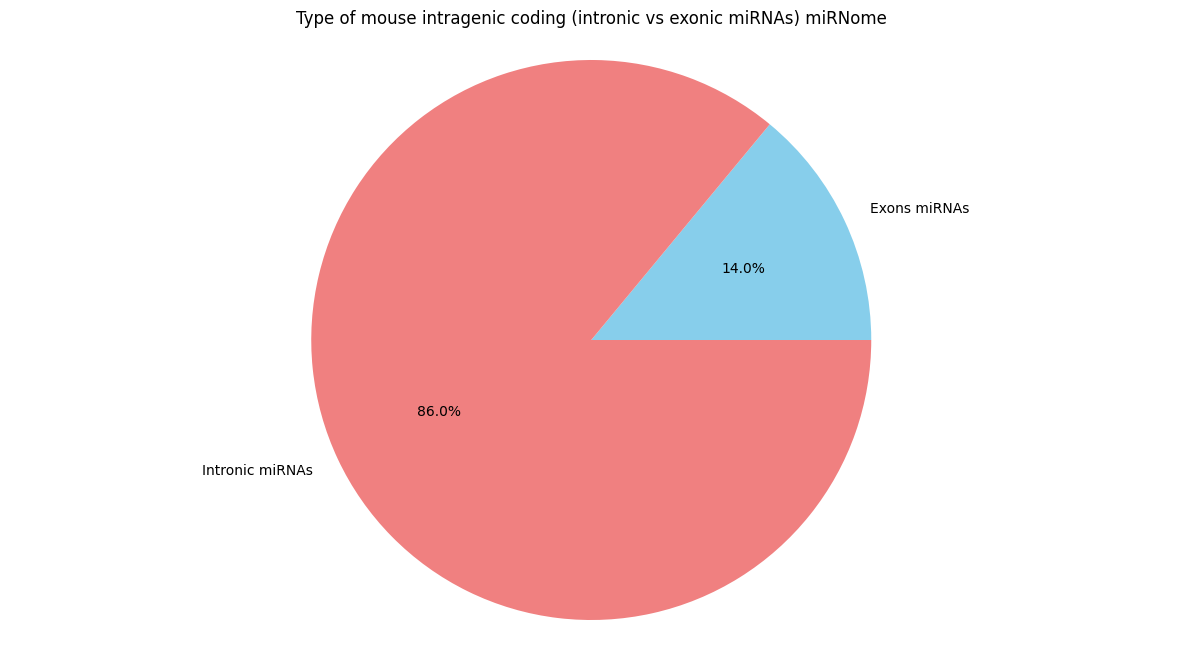

In [34]:
#Mouse miR loci distribution pie Chart
labels = ['Exons miRNAs', 'Intronic miRNAs']
sizes = [mm_exonic_intramiR_coding['Count'], mm_intronic_intramiR_coding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse intragenic coding (intronic vs exonic miRNAs) miRNome')
plt.savefig(f'{current_dir}/Pie_charts/Type of mouse intragenic coding (intronic vs exonic miRNAs) miRNome.eps')
plt.show()

In [35]:
##save the tables for MS
mm_intramiR_coding_df.to_excel(f'{current_dir}/MS_tables/Mouse_Table_protein_coding_Fig2C.xlsx', index=False)

## Plot (non-coding)

In [36]:
mm_intramiR_noncoding_df=mouse_intramiR_gene_type.loc[mouse_intramiR_gene_type['gene_type']=="non-coding gene"]

In [37]:
mm_intramiR_noncoding=mm_intramiR_noncoding_df.groupby(mm_intramiR_noncoding_df['host_gene_region']).size().reset_index(name='Count')

In [38]:
mm_intramiR_noncoding

,host_gene_region,Count
0,exons,87
1,introns,89


In [39]:
mm_exonic_intramiR_noncoding= mm_intramiR_noncoding[mm_intramiR_noncoding['host_gene_region']=='exons'].sum()
mm_intronic_intramiR_noncoding= mm_intramiR_noncoding[mm_intramiR_noncoding['host_gene_region']=='introns'].sum()

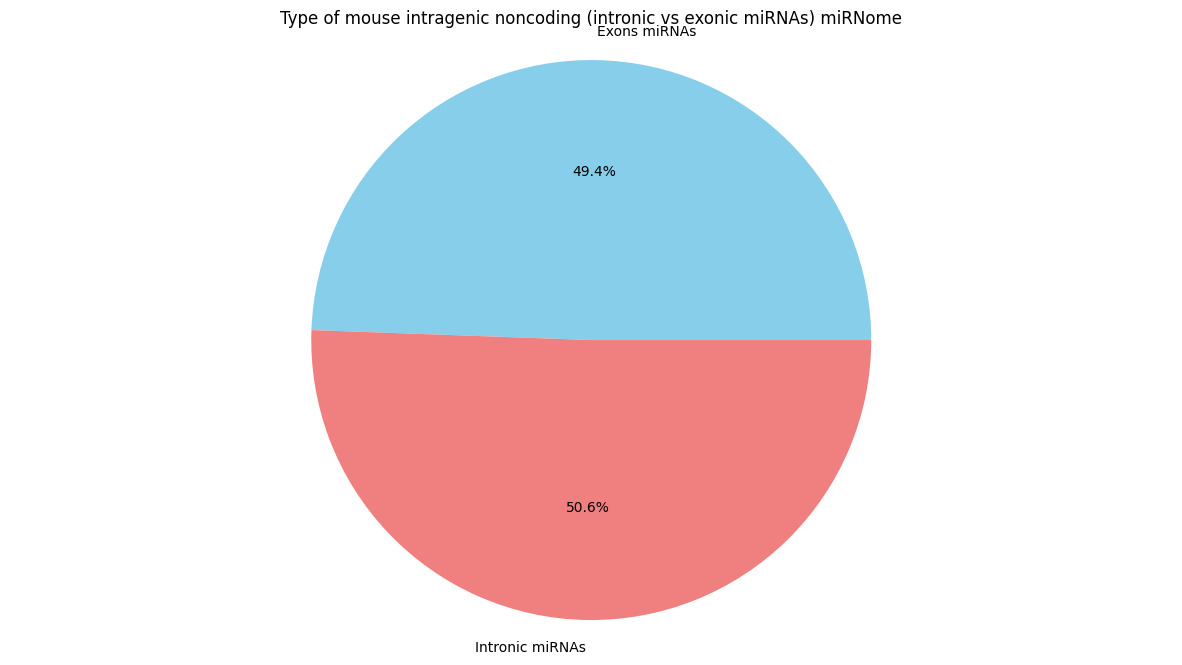

In [40]:
#Mouse miR loci distribution pie Chart
labels = ['Exons miRNAs', 'Intronic miRNAs']
sizes = [mm_exonic_intramiR_noncoding['Count'], mm_intronic_intramiR_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse intragenic noncoding (intronic vs exonic miRNAs) miRNome')
plt.savefig(f'{current_dir}/Pie_charts/Type of mouse intragenic noncoding (intronic vs exonic miRNAs) miRNome.eps')
plt.show()


In [41]:
##save the tables for MS
mm_intramiR_noncoding_df.to_excel(f'{current_dir}/MS_tables/Mouse_Table_noncoding_Fig2C.xlsx',index=False)

In [9]:
df1=pd.concat([mouse_exonicmiR_df_coding, mouse_exonicmiR_df_noncoding],axis=0)

In [10]:
df1.shape

(170, 21)

In [22]:
df2.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,pre_mRNA_length,...,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,miR_ID,gene_type
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,20510.0,...,A330023F24Rik,NR_015566.2,mmu-mir-29b-2,chr1,195037040,195037120,miRNA_primary_transcript,+,Alias=MI0000712,non-coding gene
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,20510.0,...,A330023F24Rik,NR_015566.2,mmu-mir-29c,chr1,195037547,195037634,miRNA_primary_transcript,+,Alias=MI0000577,non-coding gene
2,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,13077.0,...,Lincmd1,NR_131249.1,mmu-mir-133b,chr1,20682769,20682887,miRNA_primary_transcript,+,Alias=MI0000821,non-coding gene
3,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147.0,...,Gm24148,NR_106184.1,mmu-mir-3535,chr1,86351981,86352127,miRNA_primary_transcript,-,Alias=MI0026036,non-coding gene
4,chr1,134946233,134946299,134946299,134946299,-,1,134946233,134946299,66.0,...,Gm51265,NR_162775.1,mmu-mir-5104b,chr1,134946234,134946299,miRNA_primary_transcript,-,Alias=MI0040615,non-coding gene


In [14]:
df2=pd.read_csv(f"{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv")

In [15]:
df2=df2.drop_duplicates(subset=['miR_name'])

In [17]:
df1.shape

(173, 21)

In [16]:
df2.shape

(170, 21)

In [19]:
df1_new=df1[["hostgene_Name"]]

In [20]:
df2_new=df2[["hostgene_Name"]]

In [24]:
# Align the two Series to have the same index
df1_aligned, df2_aligned = df1_new['hostgene_Name'].align(df2_new['hostgene_Name'], fill_value=None)

# Compare the aligned Series
different_values = df1_aligned[df2_aligned != df1_aligned]

different_values

49       Chpf2
279    Dennd6b
313      Clcn7
Name: hostgene_Name, dtype: object